# Workshop #7: Regression

In [1]:
# Loading the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, PolynomialFeatures
from sklearn.metrics import confusion_matrix #, plot_confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Problem 1

The file `heights_and_weights.csv` contains data about a set of males and their heights (in cm) and weights (in kg). You want to set up a model which will predict weight from height.
* Make a scatter plot of the data. Based on the scatter plot alone, is a linear model appropriate for the data?

Build the linear model $\hat{y} = b_0 + b_1 x$.
* Make the residual plot for the data. Based on the value of $R^2$ and the residual plot, do you think a linear model is appropriate for the data?

It makes sense that `weight = 0` would relate to `height = 0`.
* Build the linear regression model without an intercept: $\hat{y} = b_1 x$. To build this model, instance the model object as `LinearRegression(fit_intercept=False)`. Note: `fit_intercept` is `True` by default.
* Determine whether this, second, linear model is appropriate for the data (use the same tool as before).


   height  weight
0   187.6   109.7
1   174.7    73.6
2   188.2    96.5
3   182.2    99.8
4   177.5    93.6


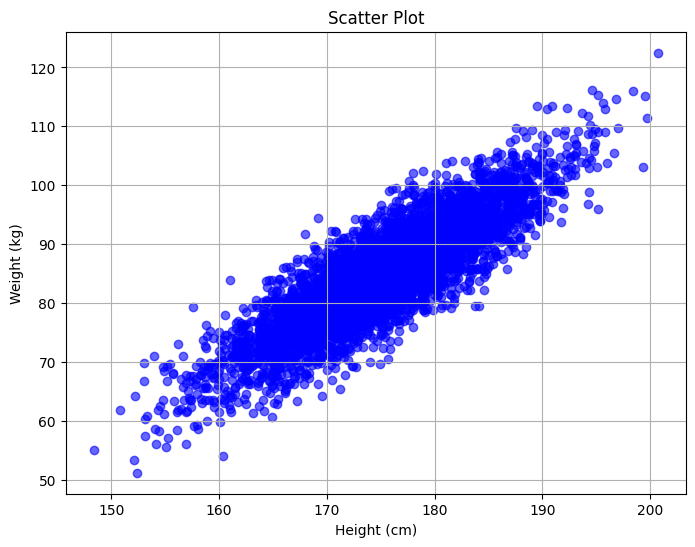

In [ ]:
df_data = pd.read_csv('heights_and_weights.csv')
print(df_data.head())

#scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_data['height'], df_data['weight'], color='blue', alpha=0.6)
plt.title('Scatter Plot')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.grid(True)
plt.show()

#Linear model is appropriate for the data

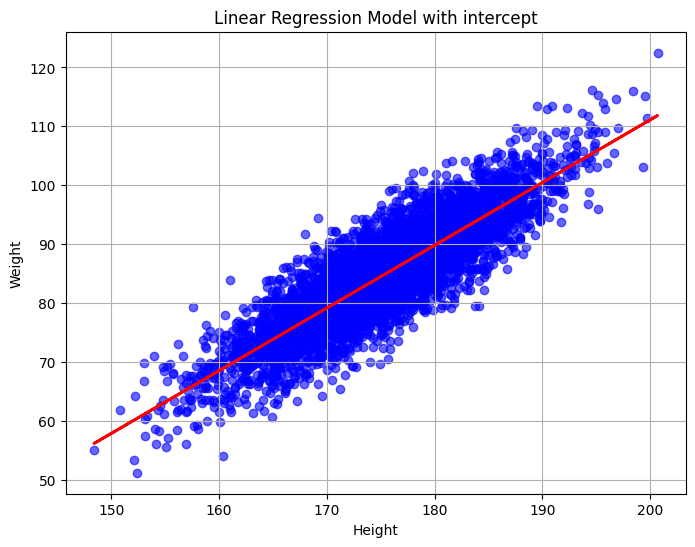

R^2: 0.7447043947011015


In [ ]:
X = df_data[['height']]
y = df_data['weight']

#linear regression model
model_with_intercept = LinearRegression(fit_intercept=True)
model_with_intercept.fit(X, y)

y_pred_with_intercept = model_with_intercept.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(df_data['height'], df_data['weight'], color='blue', alpha=0.6)
plt.plot(df_data['height'], y_pred_with_intercept, color='red', linewidth=2)
plt.title('Linear Regression Model with intercept')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.grid(True)
plt.show()

print(f'R^2: {r2_score(y, y_pred_with_intercept)}')

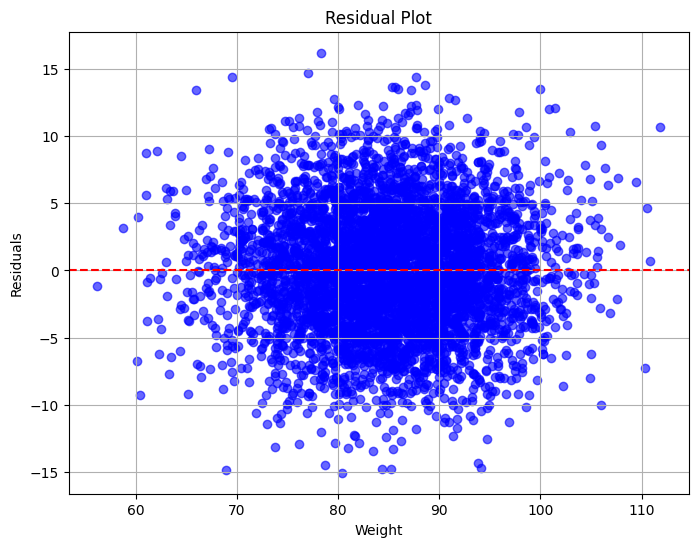

MSE: 20.54828868094172


In [ ]:
residuals = y - y_pred_with_intercept

#residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_with_intercept, residuals, color='blue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Weight')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

print(f'MSE: {mean_squared_error(y, y_pred_with_intercept)}')
#based on the residual plot being scattered and the R^2 value the linear model is appropriate for the data

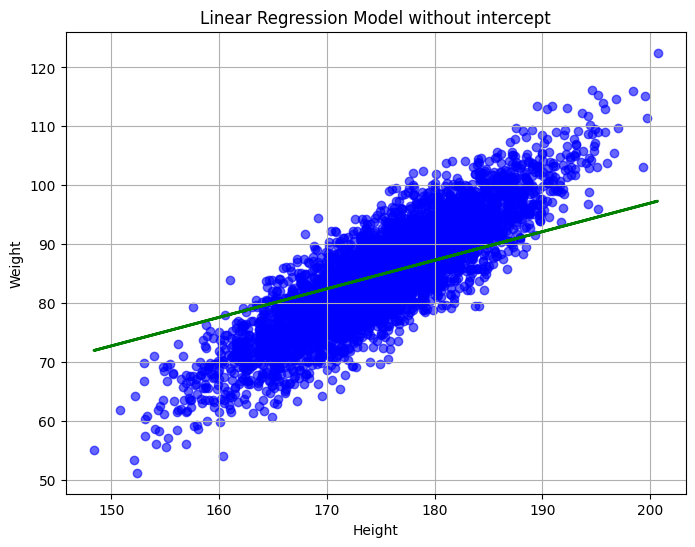

R^2: 0.7447043947011015


In [ ]:
#linear regression model without intercept
model_without_intercept = LinearRegression(fit_intercept=False)
model_without_intercept.fit(X, y)

y_pred_without_intercept = model_without_intercept.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(df_data['height'], df_data['weight'], color='blue', alpha=0.6)
plt.plot(df_data['height'], y_pred_without_intercept, color='green', linewidth=2)
plt.title('Linear Regression Model without intercept')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.grid(True)
plt.show()

print(f'R^2: {r2_score(y, y_pred_with_intercept)}')
#since R^2 values are the same, this model is appropriate

## Problem 2

The file named `mutual_funds.csv` contains information about 45 mutual funds that are part of the *Morningstar Funds 500* for 2008. The data set includes the following five variables:

* `Fund Type`: The type of fund, labeled DE (Domestic Equity), IE (International Equity), and FI (Fixed Income).
* `Net Asset Value ($)`: The closing price per share on December 31, 2007.
* `Expense Ratio (%)`: The percentage of assets deducted each fiscal year for fund expenses.
* `Morningstar Rank`: The risk adjusted star rating for each fund, from a low of 1-Star to a high of 5-Stars.
* `5-Year Average Return (%)`: The average annual return for the fund over the past five years.

The goal of this exercise is to build models to predict the 5-year average return for a domestic equity (DE) fund with a Net Asset Value of $35.53 and an expense ratio of 1.05% and a 3-Star Morningstar Rank.

* Using only **the two numerical variables** build a multivariable linear model for predicting the 5-Year Average Return. Establish if the model is appropriate for the data by considering the residual plot and calculating $R^2$.
* Predict the 5-Year Average Return for the fund we are interesed in (information is goven above; use only the variables you need for the model)
* Next, we want to include the categorical variables (`Fund Type` and `Morningstar Rank`) in a new multilinear model. To achieve this, we must code them. Using `OrdinalEncoder()`, encode the `mornigstar_rank` and `fund_type`, and then build the linear model. Once you have built the model, establish if it is appropriate by considering the residual plot and $R^2$
* Predict the 5-Year Average Return for the fund we are interested in (information given above; use all variables, be careful with the encoding).
* Finally, compare the two models using MAE, MSE and RMSE and decide which one performs better (use the original data to make the assessment, no need to split it into train and test).


In [16]:
mf_data = pd.read_csv('mutual_funds.csv')
print(mf_data.head())

mf_data['morningstar_rank'] = mf_data['morningstar_rank'].str.replace('-Star', '').astype(int)

                        fund_name fund_type  net_asset_value  expense_ratio  \
0      Amer Cent Inc & Growth Inv        DE            28.88           0.67   
1     American Century Intl. Disc        IE            14.37           1.41   
2  American Century Tax-Free Bond        FI            10.73           0.49   
3          American Century Ultra        DE            24.94           0.99   
4                           Ariel        DE            46.39           1.03   

  morningstar_rank  five_year_avg_return  
0           2-Star                 12.39  
1           3-Star                 30.53  
2           4-Star                  3.34  
3           3-Star                 10.88  
4           2-Star                 11.32  


R² for Model 1: 0.37310517954477973


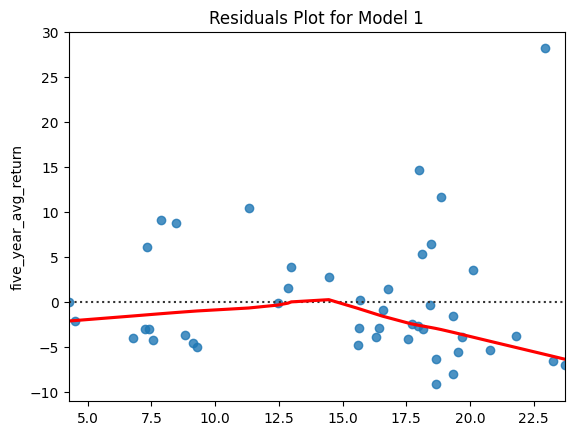

In [17]:
X1 = mf_data[['net_asset_value', 'expense_ratio']]
y = mf_data['five_year_avg_return']

#linear regression model
model1 = LinearRegression()
model1.fit(X1, y)

y_pred1 = model1.predict(X1)

r2_1 = r2_score(y, y_pred1)
print(f"R² for Model 1: {r2_1}")

#plot residuals
residuals1 = y - y_pred1
sns.residplot(x=y_pred1, y=residuals1, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals Plot for Model 1')
plt.show()

In [18]:
#predict the 5 year average return
X_new = pd.DataFrame([[35.53, 1.05]], columns=['net_asset_value', 'expense_ratio'])
predicted_return_1 = model1.predict(X_new)
print(f"Predicted 5-Year Average Return: {predicted_return_1[0]}")

Predicted 5-Year Average Return: 17.909543677496266


R² for Model 2: 0.5121278918325249


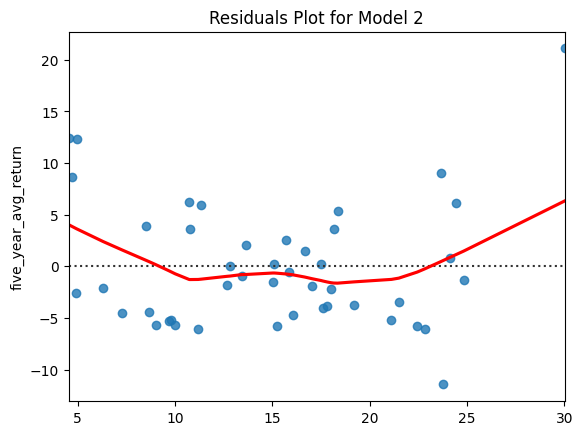

In [19]:
encoder = OrdinalEncoder()

mf_data['fund_type_encoded'] = encoder.fit_transform(mf_data[['fund_type']])

X2 = mf_data[['net_asset_value', 'expense_ratio', 'fund_type_encoded', 'morningstar_rank']]
y = mf_data['five_year_avg_return']

#linear regression model
model2 = LinearRegression()
model2.fit(X2, y)

y_pred2 = model2.predict(X2)

r2_2 = r2_score(y, y_pred2)
print(f"R² for Model 2: {r2_2}")

#plot residuals
residuals2 = y - y_pred2
sns.residplot(x=y_pred2, y=residuals2, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals Plot for Model 2')
plt.show()

In [20]:
#predict the 5 year average return
fund_type_input = pd.DataFrame([['DE']], columns=['fund_type'])
fund_type_encoded = encoder.transform(fund_type_input)[0][0]

morningstar_rank_encoded = 3

fund_of_interest = pd.DataFrame([[35.53, 1.05, fund_type_encoded, morningstar_rank_encoded]], columns=['net_asset_value', 'expense_ratio', 'fund_type_encoded', 'morningstar_rank'])

predicted_5_year_return = model2.predict(fund_of_interest)

print(f"Predicted 5-Year Average Return: {predicted_5_year_return[0]}")

Predicted 5-Year Average Return: 15.254795607318115


In [21]:
#calculate MAE, MSE, and RMSE
mae_1 = mean_absolute_error(y, y_pred1)
mse_1 = mean_squared_error(y, y_pred1)
rmse_1 = np.sqrt(mse_1)

mae_2 = mean_absolute_error(y, y_pred2)
mse_2 = mean_squared_error(y, y_pred2)
rmse_2 = np.sqrt(mse_2)

print(f"Model 1: MAE = {mae_1}, MSE = {mse_1}, RMSE = {rmse_1}")
print(f"Model 2: MAE = {mae_2}, MSE = {mse_2}, RMSE = {rmse_2}")
#model 2 is more appropriate since R^2 is higher and MSE is lower than linear

Model 1: MAE = 5.07745503127636, MSE = 47.54545799349688, RMSE = 6.895321456864566
Model 2: MAE = 4.692991934847558, MSE = 37.001586339844984, RMSE = 6.082892925232613


## Problem 3

The file `weights_and_mpg.csv` contains some data about cars. The goal is to build a model that can be used to predict the **mileage** of a car (i.e. the fuel efficiency) based on the car's weight.
* Build a linear model of the mileage using weight as input. Give reasons why the linear model is not appropriate for these data.
* Build a quadratic model for the mileage using weight as input by transforming the data using appropriate polynomial transformation. Provide evidence that this model is (more) appropriate for the data than the linear model.


In [ ]:
wm_data = pd.read_csv('weights_and_mpg.csv')
print(wm_data.head())

   weight   mpg
0   4.360  16.9
1   4.054  15.5
2   3.605  19.2
3   3.940  18.5
4   2.155  30.0


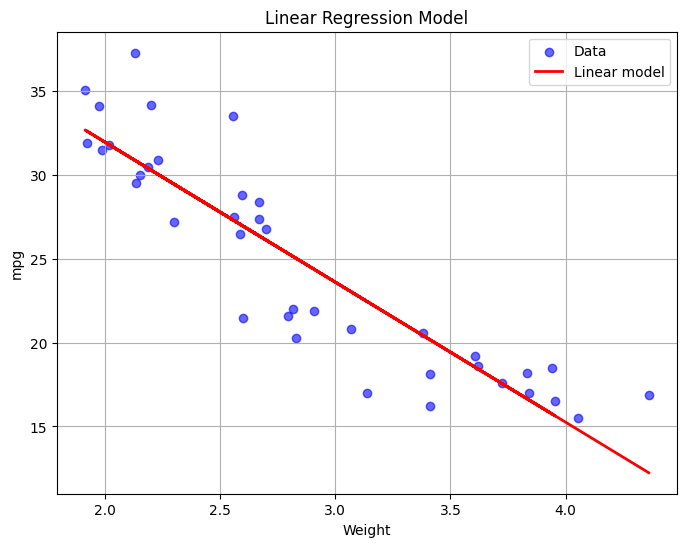

Linear Model R^2: 0.8155369188106257
Linear MSE: 7.699347212431658


In [ ]:
X = wm_data[['weight']]
y = wm_data['mpg']

#linear regression model
model_with_intercept = LinearRegression(fit_intercept=True)
model_with_intercept.fit(X, y)

y_pred_with_intercept = model_with_intercept.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(wm_data['weight'], wm_data['mpg'], color='blue', alpha=0.6, label='Data')
plt.plot(wm_data['weight'], y_pred_with_intercept, color='red', linewidth=2, label='Linear model')
plt.title('Linear Regression Model')
plt.xlabel('Weight')
plt.ylabel('mpg')
plt.grid(True)
plt.legend()
plt.show()

print(f'Linear Model R^2: {r2_score(y, y_pred_with_intercept)}')
mse_linear = mean_squared_error(y, y_pred_with_intercept)
print(f'Linear MSE: {mse_linear}')

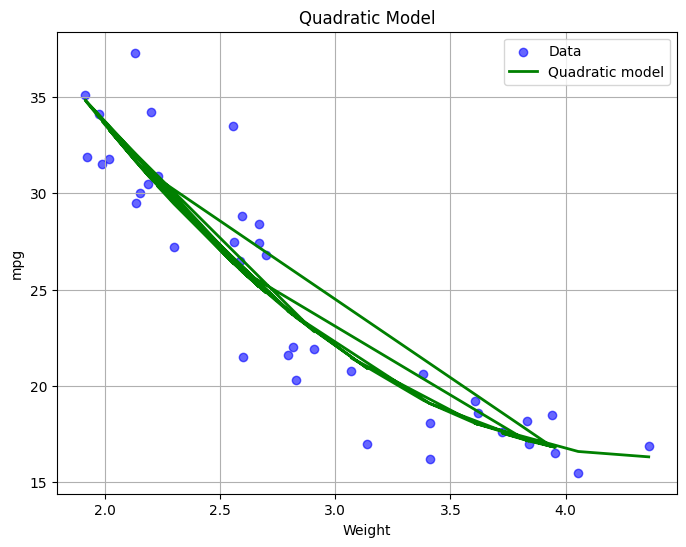

Quadratic Model R^2: 0.8597310866068941
Quadratic MSE: 5.854716620586502


In [ ]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

#quadratic regression model
model_with_intercept_quadratic = LinearRegression(fit_intercept=True)
model_with_intercept_quadratic.fit(X_poly, y)

y_pred_with_intercept_quadratic = model_with_intercept_quadratic.predict(X_poly)

plt.figure(figsize=(8, 6))
plt.scatter(wm_data['weight'], wm_data['mpg'], color='blue', alpha=0.6, label='Data')
plt.plot(wm_data['weight'], y_pred_with_intercept_quadratic, color='green', linewidth=2, label='Quadratic model')
plt.title('Quadratic Model')
plt.xlabel('Weight')
plt.ylabel('mpg')
plt.grid(True)
plt.legend()
plt.show()

print(f'Quadratic Model R^2: {r2_score(y, y_pred_with_intercept_quadratic)}')
mse_quadratic = mean_squared_error(y, y_pred_with_intercept_quadratic)
print(f'Quadratic MSE: {mse_quadratic}')
#this model is more appropriate for the data than the linear model
#since R^2 is higher and MSE is lower than linear

## Problem 4

The file `gender_classification.csv` contains data about the gender, weights and heights of 10000 people. The goal of this task is to build a logistic regression model to predict the gender of a person based on their height and weight
* Split the given data set into a **train** and **test** set. To ensure everyone gets the same results, use `random_state=1234` when creating the splits
* Build the logistic model using the **train data only**
* In the next step, evaluate the model’s performance on the test data. Construct the confusion matrix, and calculate the model’s mean accuracy score
* Finally, make a prediction about the gender of the *median person* and the *mean person*, i.e. the persons who have median/mean height and median/mean weight.


In [ ]:
gender_data = pd.read_csv('gender_classification.csv')
print(gender_data.head())

   height  weight  gender
0   162.6    66.6  Female
1   164.7    71.9  Female
2   153.0    43.5  Female
3   182.9    95.7    Male
4   163.1    56.6  Female


In [ ]:
gender_data = gender_data.dropna()

In [ ]:
gender_mapping = {'Female': 0, 'Male': 1}
gender_data['gender'] = gender_data['gender'].map(gender_mapping)

X = gender_data[['height', 'weight']]
y = gender_data['gender']

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

#logistic model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print()
print(f"Accuracy: {accuracy:.4f}")

#median and mean
median_height = np.median(gender_data['height'])
median_weight = np.median(gender_data['weight'])
mean_height = np.mean(gender_data['height'])
mean_weight = np.mean(gender_data['weight'])

median_person = pd.DataFrame([[median_height, median_weight]], columns=['height', 'weight'])
mean_person = pd.DataFrame([[mean_height, mean_weight]], columns=['height', 'weight'])

pred_median = logreg.predict(median_person)
pred_mean = logreg.predict(mean_person)

if pred_median[0] == 0:
  pred_median_gender = 'Female'
else:
  'Male'

if pred_mean[0] == 0:
  pred_mean_gender = 'Female'
else:
  'Male'

print()
print(f"Predicted gender of the median person: {pred_median_gender} - Height: {median_height}, Weight: {median_weight}")
print(f"Predicted gender of the mean person: {pred_mean_gender} - Height: {mean_height}, Weight: {mean_weight}")

Confusion Matrix:
[[909  86]
 [ 87 918]]

Accuracy: 0.9135

Predicted gender of the median person: Female - Height: 168.4, Weight: 73.1
Predicted gender of the mean person: Male - Height: 168.57394, Weight: 73.22826
